In [ ]:
# !pip install dataframe_image

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (12,12)
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('data/Cleaned.csv')

In [8]:
#Ref  https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/older-adults.html
# bins = pd.IntervalIndex.from_tuples([(0,30),(30,40),(40,50),(50,64),(64,np.inf)])
bins = pd.IntervalIndex.from_tuples([(0,25),(25,50),(50,np.inf)])
df['AgeBin'] = pd.cut(df.Age,bins)
df.AgeBin.value_counts()

(25.0, 50.0]    1369
(0.0, 25.0]     1351
(50.0, inf]      311
Name: AgeBin, dtype: int64

In [9]:
df = df[~df['Profession'].isin(['Others'])]
# df.Profession.value_counts()
countries = ['China', 'Mexico', 'Bangladesh', 'United States','Malaysia','Pakistan','Zambia','Japan']
cleaned =df[df['Country'].isin(countries)]
cleaned = cleaned[~((cleaned['Country'].isin(['Bangladesh','Pakistan'])) & (cleaned['Age'] > 50))]
cleaned = cleaned[~((cleaned['Country'].isin(['Mexico'])) & (cleaned['Education'] =='P'))]
cleaned.shape
# cleaned = cleaned.drop((cleaned['Country'] == ' Bangladesh') & (cleaned['Age'] > 50)) 
# cleaned.groupby(['Country','Education'])['Susceptiblity'].agg({'a':'mean','b':'std'})

(2647, 84)

In [5]:
criterion = ['Access_Of_Information', 'KnowledgeScore', 'OpinionScoring',
       'Susceptiblity', 'BehaveScore', 'PsychologicalHeath']
sub_field = ['AgeBin','Education','Profession','Sex']
import math
for col in criterion:
    for f in sub_field:
        print(col,f)
        stats = cleaned.groupby(['Country',f])[col].agg(['mean', 'count', 'std'])
        # print(stats)
        # print('-'*30)

        ci95_hi = []
        ci95_lo = []
        ci90_lo = []
        ci90_hi = []

        for i in stats.index:
            m, c, s = stats.loc[i]
            ci95_hi.append(m + 1.95*s)
            ci95_lo.append(m - 1.95*s)
            ci90_hi.append(m + 1.65*s)
            ci90_lo.append(m - 1.65*s)

        stats['CI95_high'] = ci95_hi
        stats['CI95_low'] = ci95_lo
        stats['CI90_high'] = ci90_hi
        stats['CI90_low'] = ci90_lo
        stats['CI95_low'] = stats['CI95_low'].apply(lambda x: max(0,x))
        stats['CI90_low'] = stats['CI90_low'].apply(lambda x: max(0,x))
        stats.rename(columns={'mean':'Mean','count':'Count','std':'Std.'},inplace=True)
        print(stats)
        stats.to_csv(f'{col}_{f}_table.csv',index=True,float_format='%.3f')


Access_Of_Information AgeBin
                                Mean  Count      Std.  CI95_high  CI95_low  \
Country       AgeBin                                                         
Bangladesh    (0.0, 25.0]   3.087349    332  0.845223   4.735534  1.439165   
              (25.0, 50.0]  3.166667    150  0.862466   4.848476  1.484858   
              (50.0, inf]        NaN      0       NaN        NaN  0.000000   
China         (0.0, 25.0]        NaN      0       NaN        NaN  0.000000   
              (25.0, 50.0]       NaN      0       NaN        NaN  0.000000   
              (50.0, inf]        NaN      0       NaN        NaN  0.000000   
Japan         (0.0, 25.0]   2.357143     14  0.744946   3.809788  0.904497   
              (25.0, 50.0]  2.400000     55  0.914897   4.184050  0.615950   
              (50.0, inf]   2.700000     10  0.674949   4.016150  1.383850   
Malaysia      (0.0, 25.0]   3.500000     12  0.904534   5.263841  1.736159   
              (25.0, 50.0]  3.20512

                                 Mean  Count      Std.  CI95_high   CI95_low  \
Country       AgeBin                                                           
Bangladesh    (0.0, 25.0]   17.349398    332  2.563672  22.348559  12.350236   
              (25.0, 50.0]  17.740000    150  2.406451  22.432580  13.047420   
              (50.0, inf]         NaN      0       NaN        NaN   0.000000   
China         (0.0, 25.0]   16.792651    381  4.119472  24.825622   8.759680   
              (25.0, 50.0]  16.836735    245  3.902222  24.446067   9.227403   
              (50.0, inf]   14.325581     86  2.855096  19.893019   8.758144   
Japan         (0.0, 25.0]   14.285714     14  2.267787  18.707899   9.863530   
              (25.0, 50.0]  13.436364     55  2.740395  18.780134   8.092594   
              (50.0, inf]   15.400000     10  2.319004  19.922057  10.877943   
Malaysia      (0.0, 25.0]   15.250000     12  2.416797  19.962755  10.537245   
              (25.0, 50.0]  16.119658   

                           Mean  Count      Std.  CI95_high  CI95_low  \
Country       Sex                                                       
Bangladesh    Female   9.722467    227  1.474736  12.598203  6.846731   
              Male    10.078431    255  1.123183  12.268639  7.888224   
China         Female   6.095679    324  2.098233  10.187233  2.004125   
              Male     6.703608    388  2.047823  10.696863  2.710354   
Japan         Female   8.413043     46  1.543101  11.422090  5.403997   
              Male     8.666667     33  1.241639  11.087862  6.245471   
Malaysia      Female   9.933333     45  1.053134  11.986944  7.879722   
              Male    10.020202     99  0.979169  11.929581  8.110823   
Mexico        Female   9.394595    185  1.560718  12.437994  6.351195   
              Male     9.498688    381  1.208794  11.855836  7.141540   
Pakistan      Female   9.192857    140  1.661656  12.433086  5.952629   
              Male     9.570248    121  1.687337  1

In [28]:
criterion

['Access_Of_Information',
 'KnowledgeScore',
 'OpinionScoring',
 'Susceptiblity',
 'BehaveScore',
 'PsychologicalHeath']

In [27]:
countries = df.Country.value_counts().index[:6].tolist()
countries

['China', 'Mexico', 'Bangladesh', 'United States', 'Pakistan', 'Malaysia']

In [27]:
df = cleaned

<h1> Generating Graph </h1>

In [8]:
#Create Necessary Dirs
import os
import dataframe_image as dfi
criterion = ['Access_Of_Information', 'KnowledgeScore', 'OpinionScoring','Susceptiblity', 'BehaveScore', 'PsychologicalHeath', 'LearntCovid']
field = ['Education','AgeBin','Sex','Profession']
for c in criterion:
    for f in field:
        if not os.path.exists(os.path.join('Graph',c,f)):
            os.makedirs(os.path.join('Graph',c,f))

In [25]:
from scipy import stats
def chi_squared_test(df,country,column1,column2,prob=0.95):
#     print(column2,df[column2])
    contingency_table = pd.crosstab(df[column1],df[column2])
#     print(column1,column2,contingency_table)
    stat,p,dof,expected = stats.chi2_contingency(contingency_table)
    critical = stats.chi2.ppf(prob,dof)
    contingency_table.plot.bar(stacked=False)
    plt.title(country,fontsize=100)
    plt.tight_layout()
    plt.savefig(f'Graph/{column2}/{column1}/{column2}_{column1}_{country}.png',dpi=80)
    return country, stat,critical

In [19]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

In [46]:
df[df.Country == 'China'].Education.value_counts()
# df[df.Country == 'Zambia'].Profession.value_counts()

T    565
P    106
S     32
Name: Education, dtype: int64

Susceptiblity Education
         Country      Value   Critical  Significant
0          China  20.370215  15.507313         True
1         Mexico   2.754621   9.487729        False
2     Bangladesh   4.878309   9.487729        False
3  United States   4.038791   9.487729        False
4       Malaysia   1.161171   9.487729        False
5       Pakistan  21.456122   9.487729         True
6         Zambia   0.000000        NaN        False
7          Japan   2.370639   7.814728        False
Susceptiblity AgeBin
         Country      Value   Critical  Significant
0          China  74.529462  15.507313         True
1         Mexico  41.399911  15.507313         True
2     Bangladesh  33.201117   9.487729         True
3  United States  14.686899  15.507313        False
4       Malaysia  12.925071  15.507313        False
5       Pakistan  11.896928   9.487729         True
6         Zambia   7.945805  15.507313        False
7          Japan   6.170328  12.591587        False
Susceptiblity Sex
 

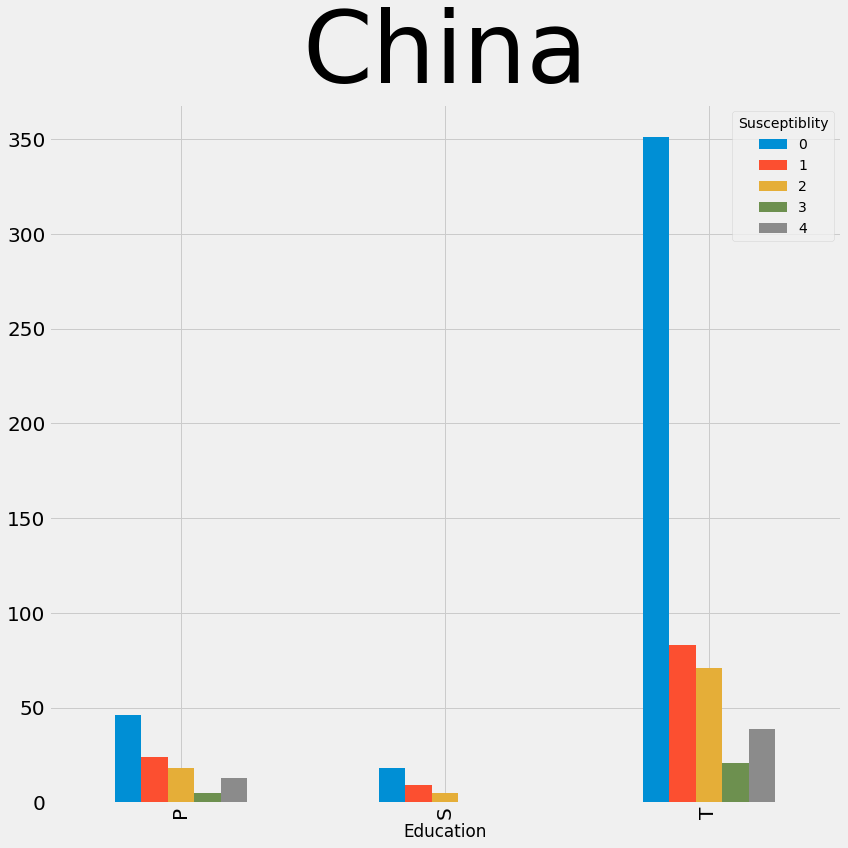

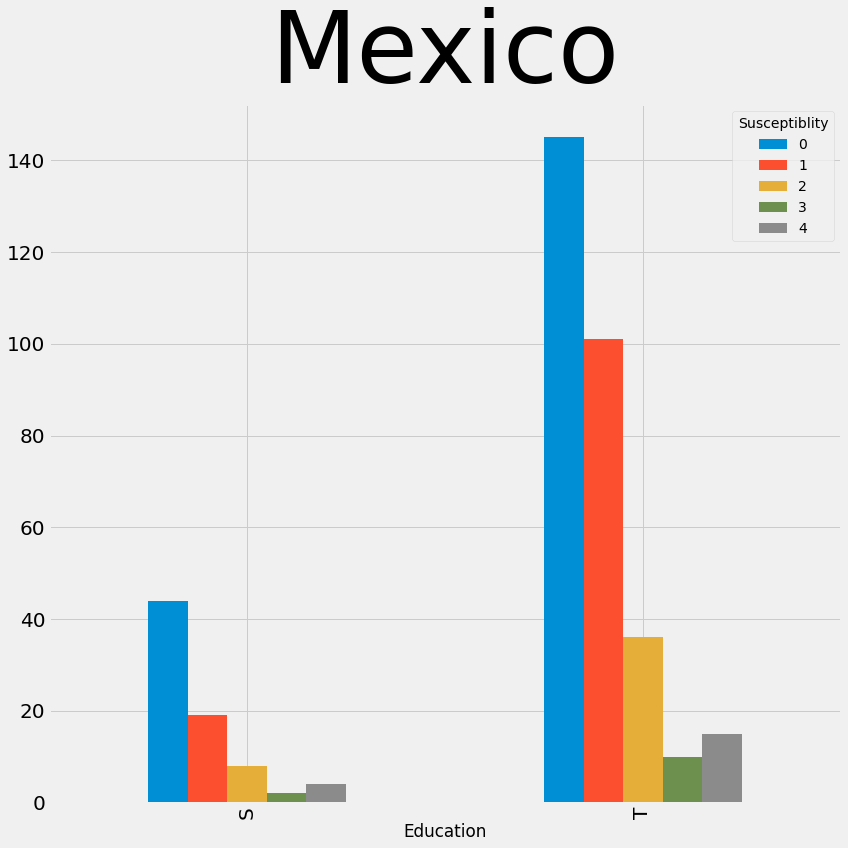

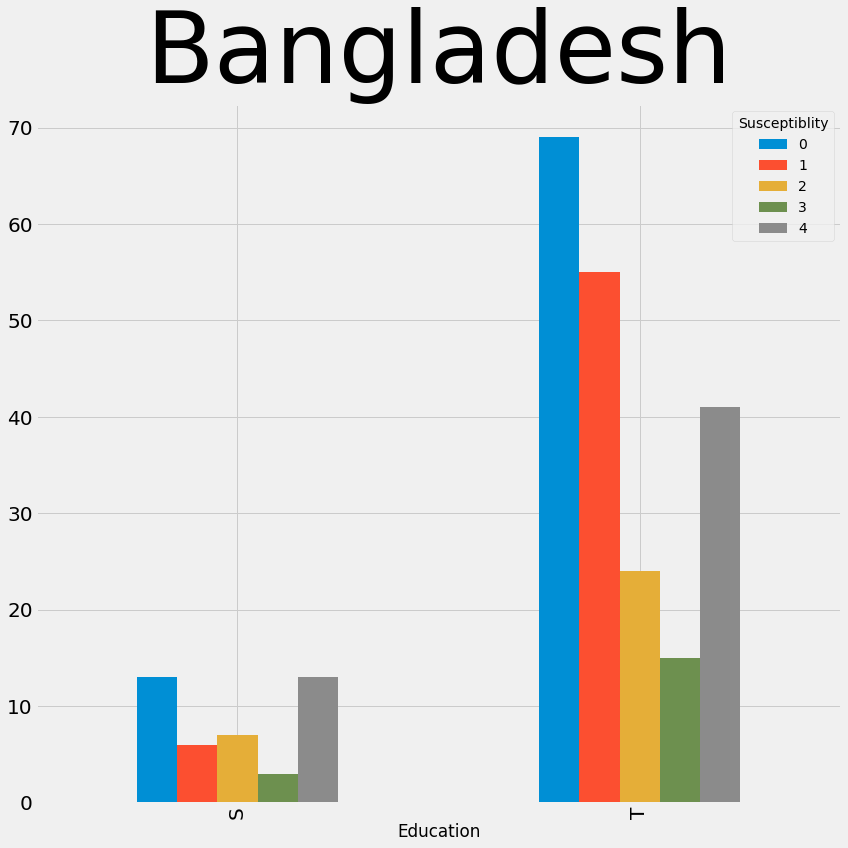

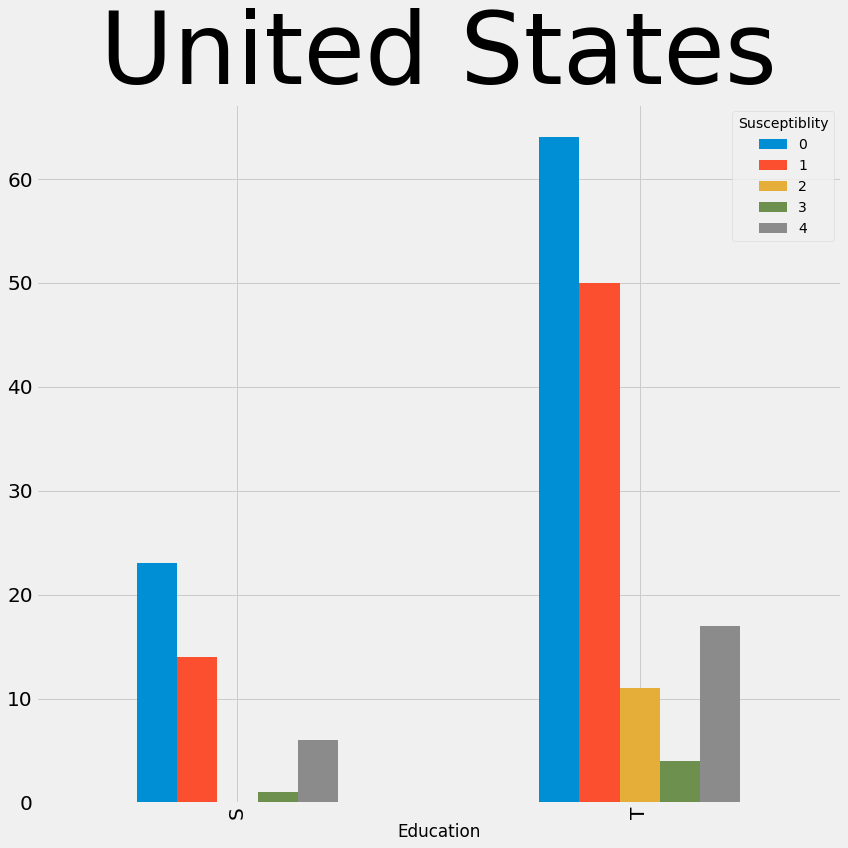

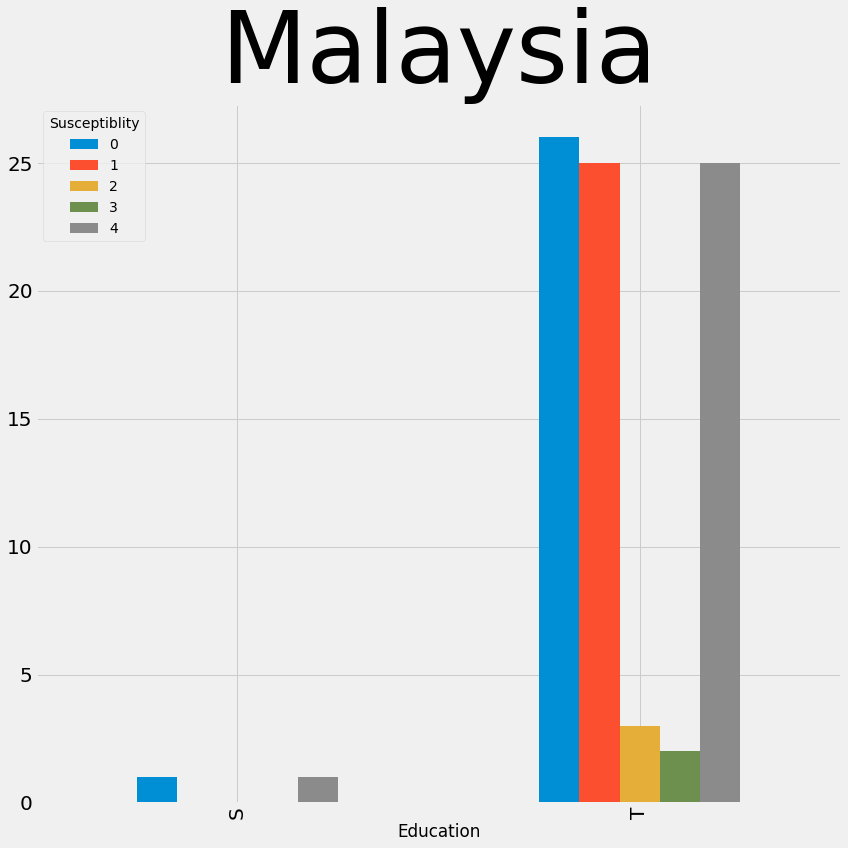

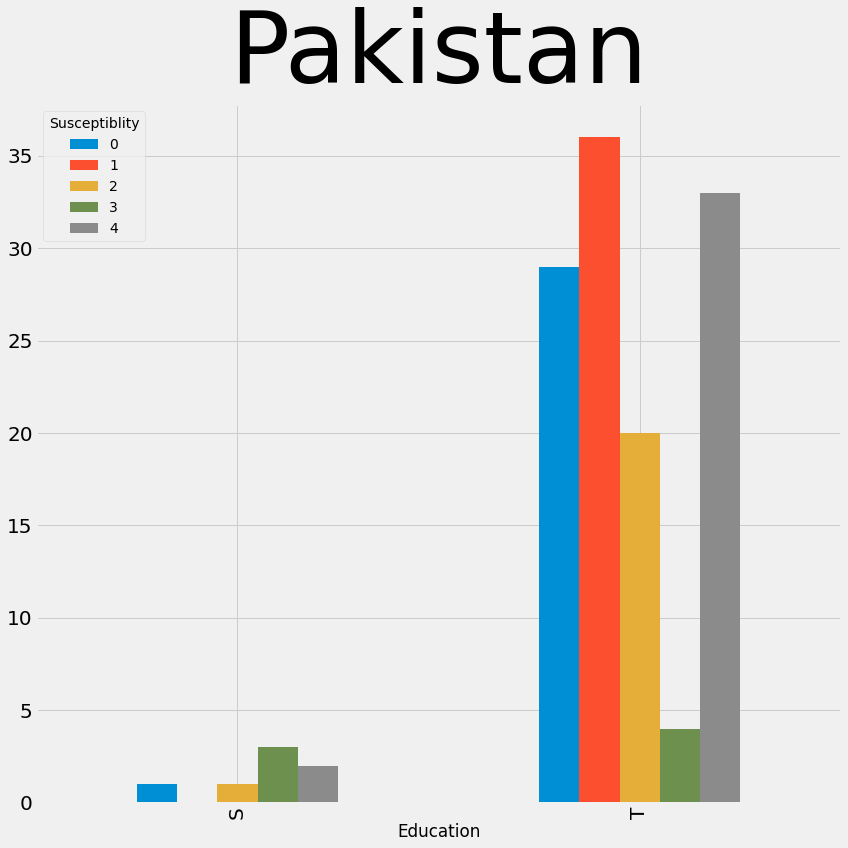

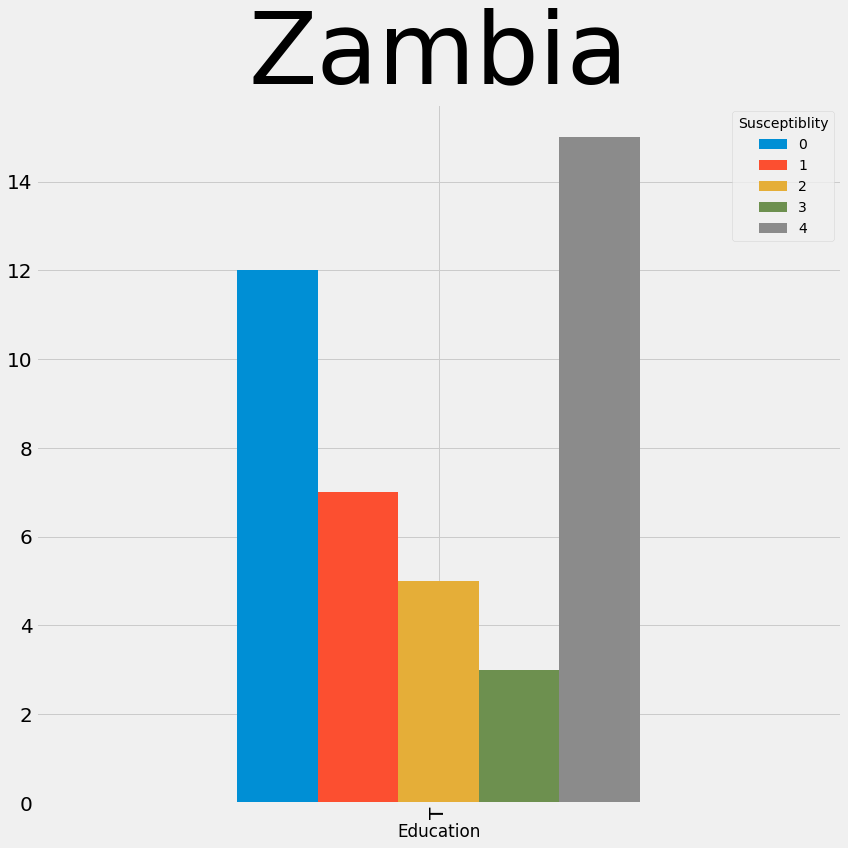

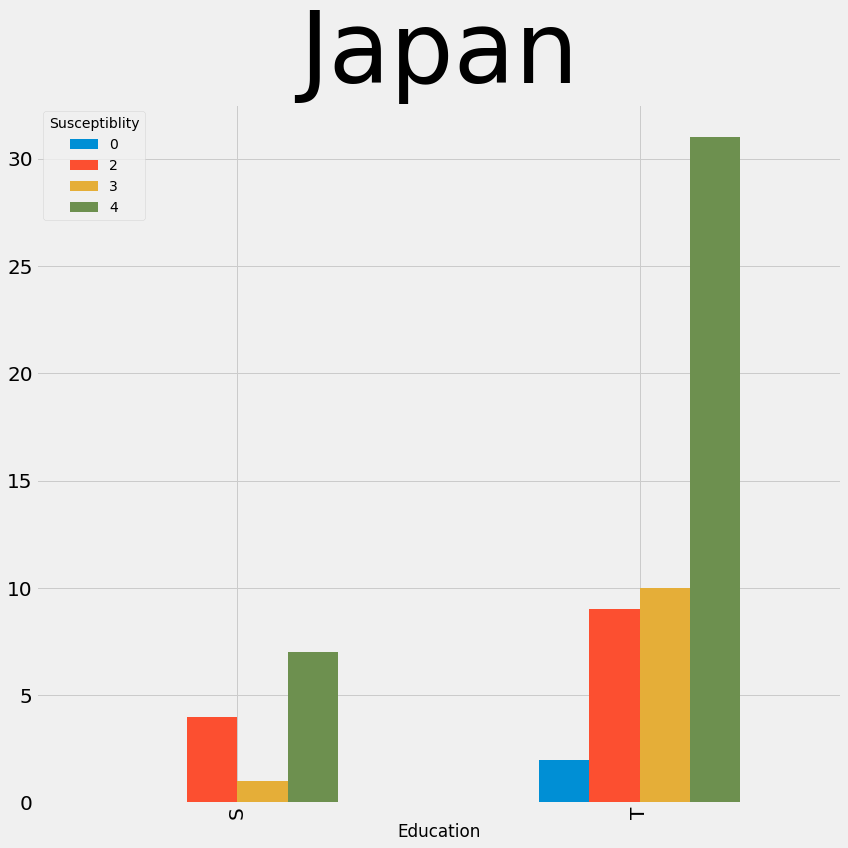

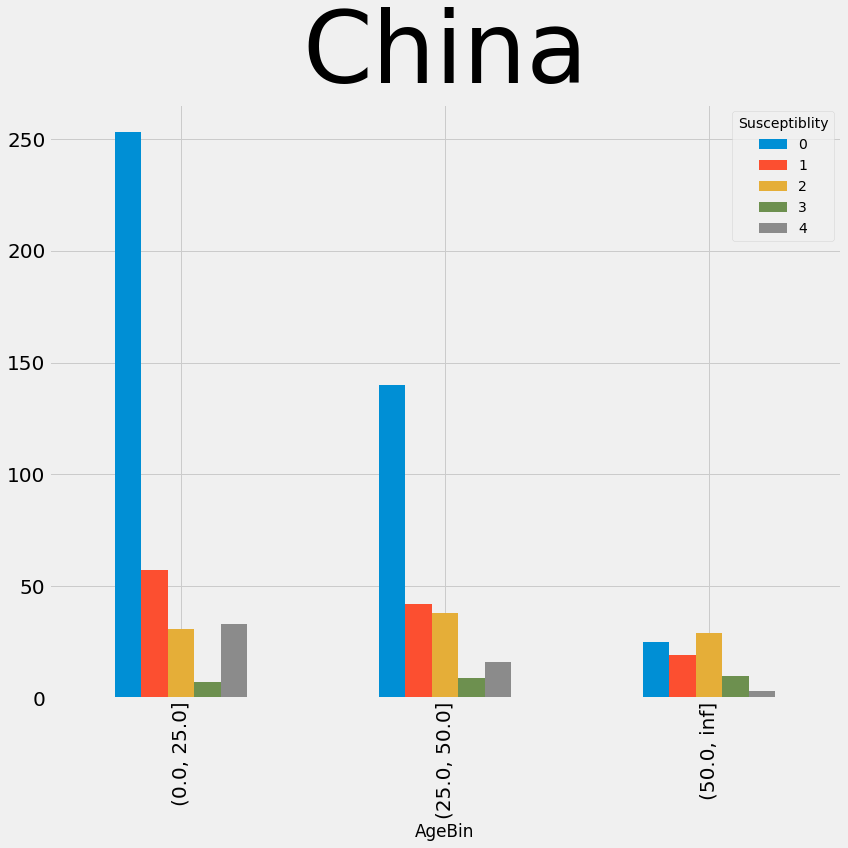

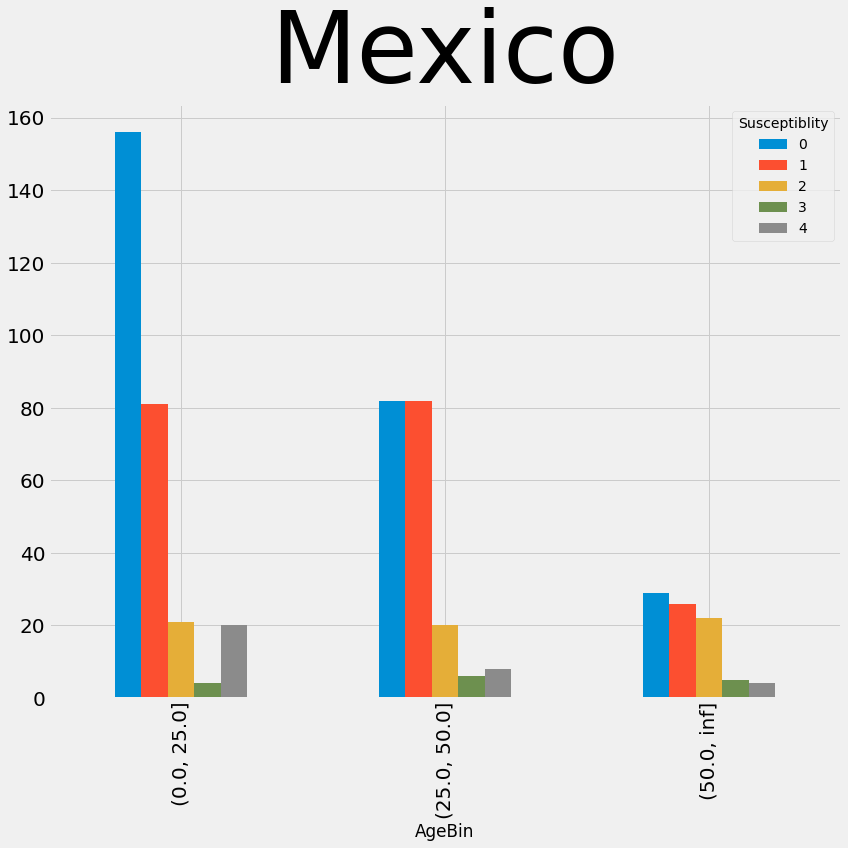

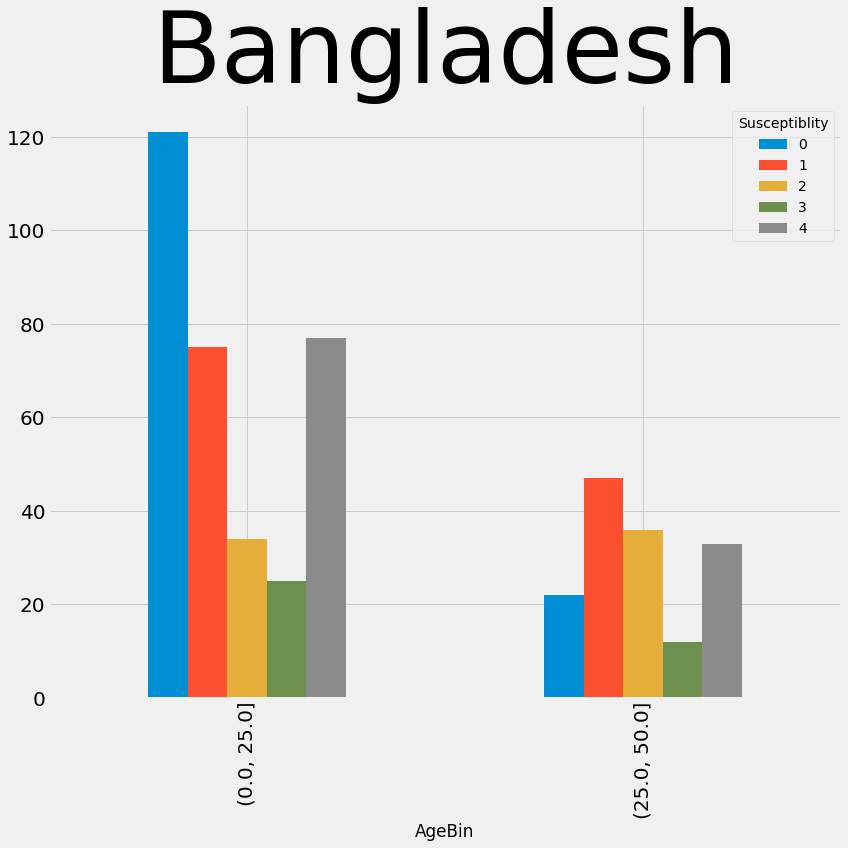

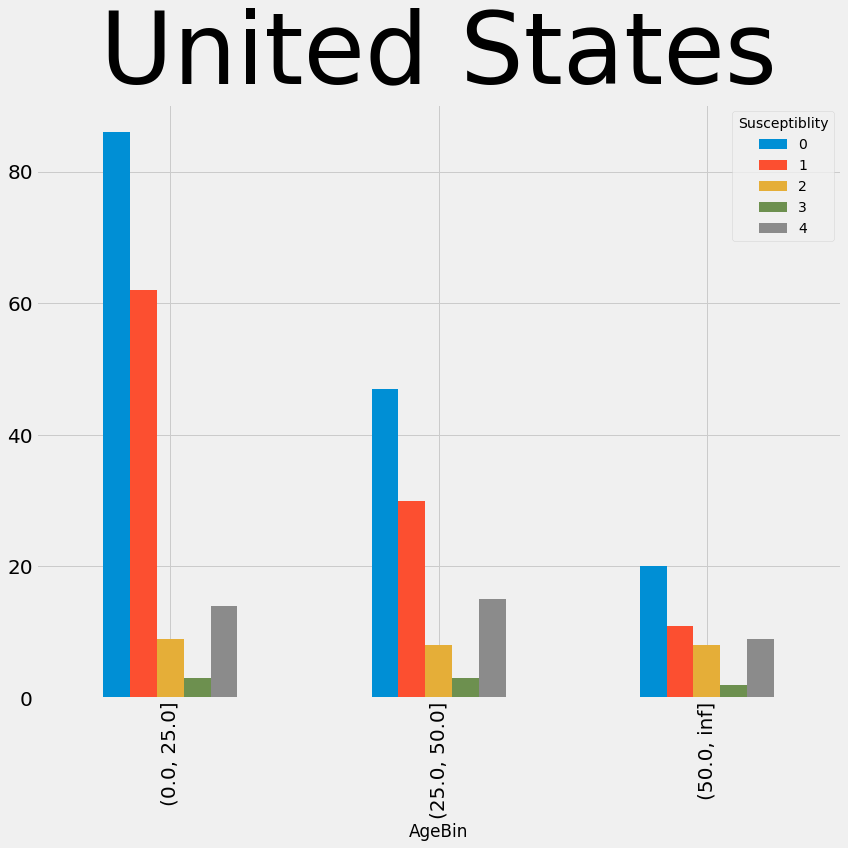

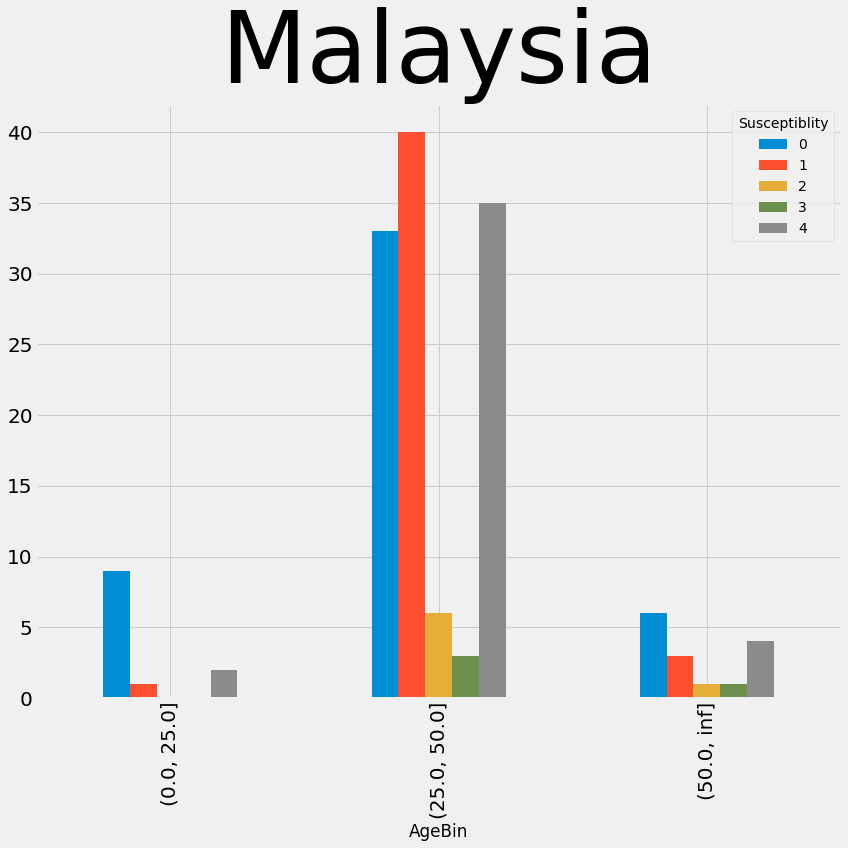

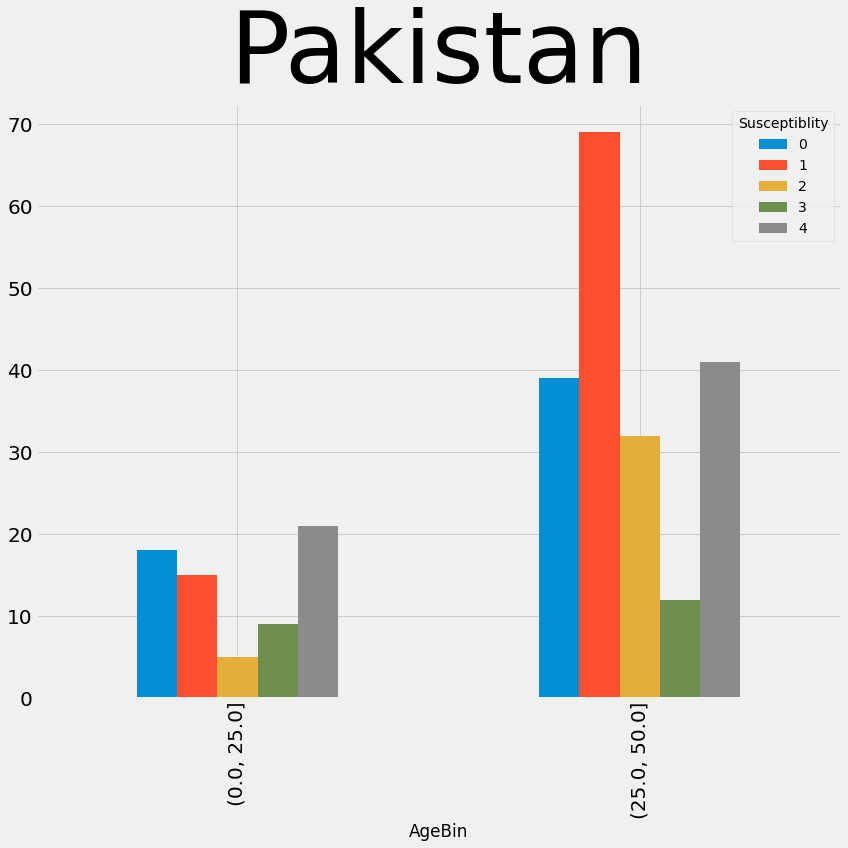

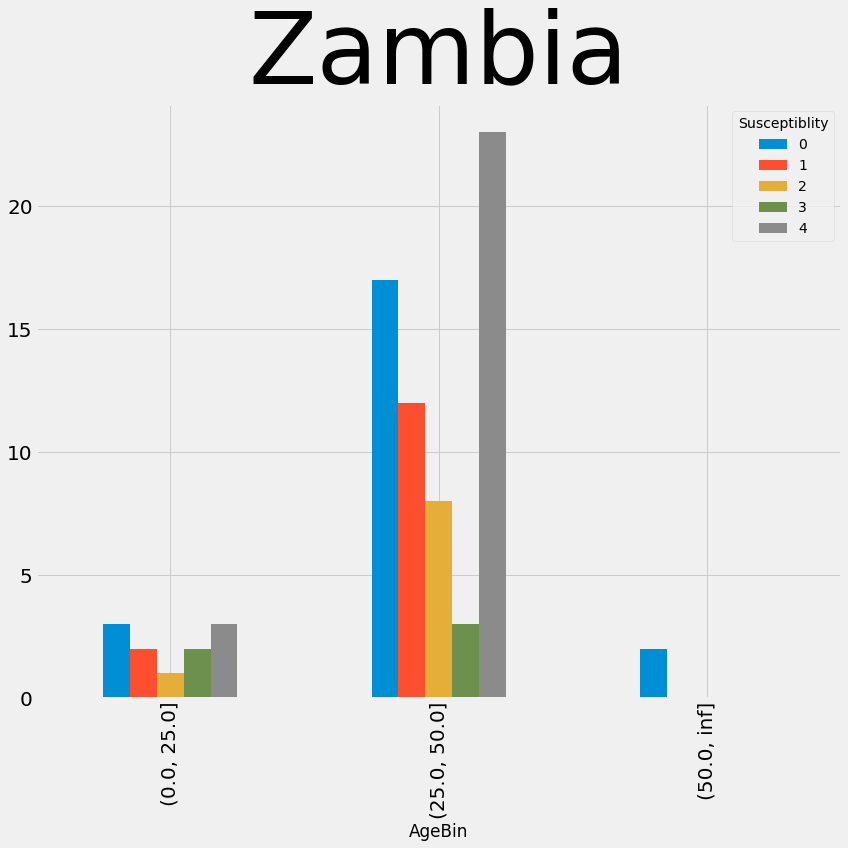

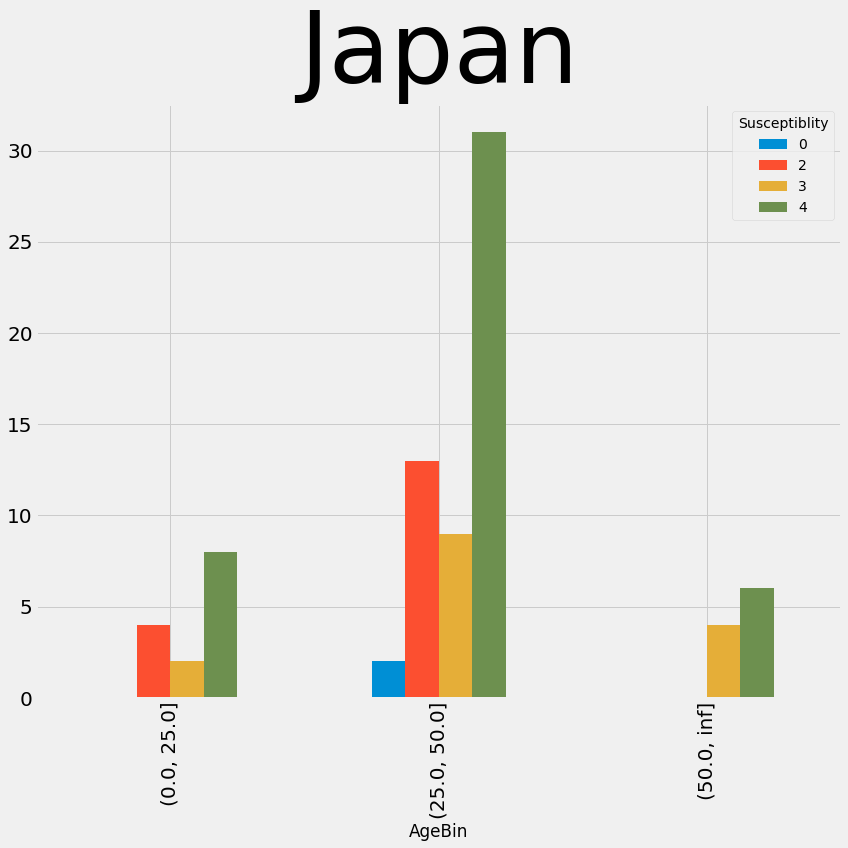

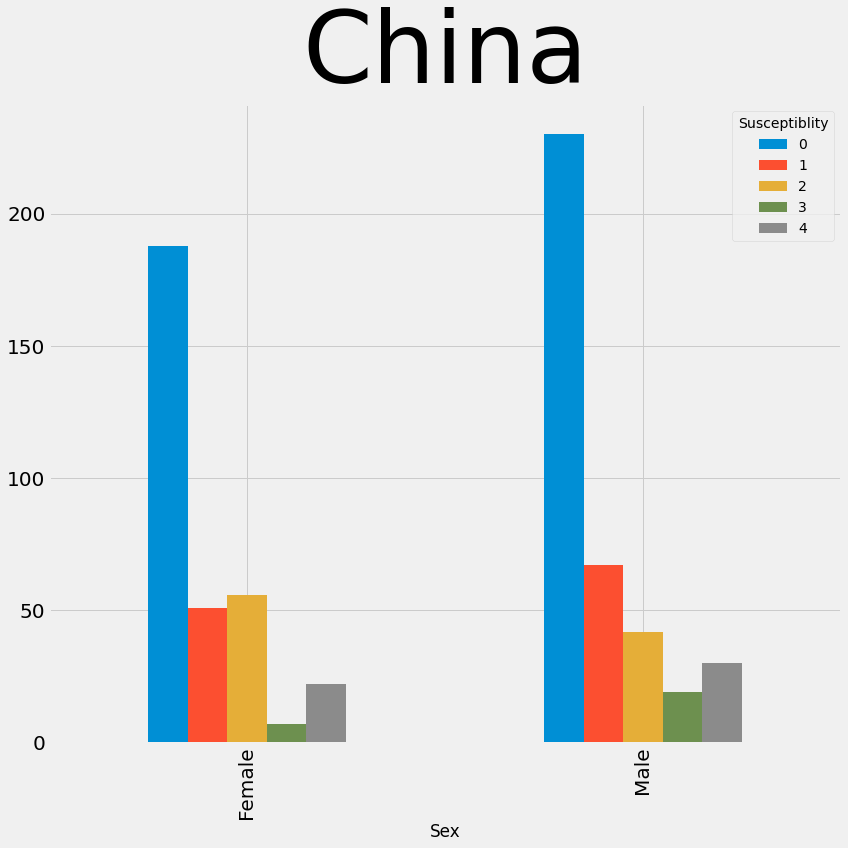

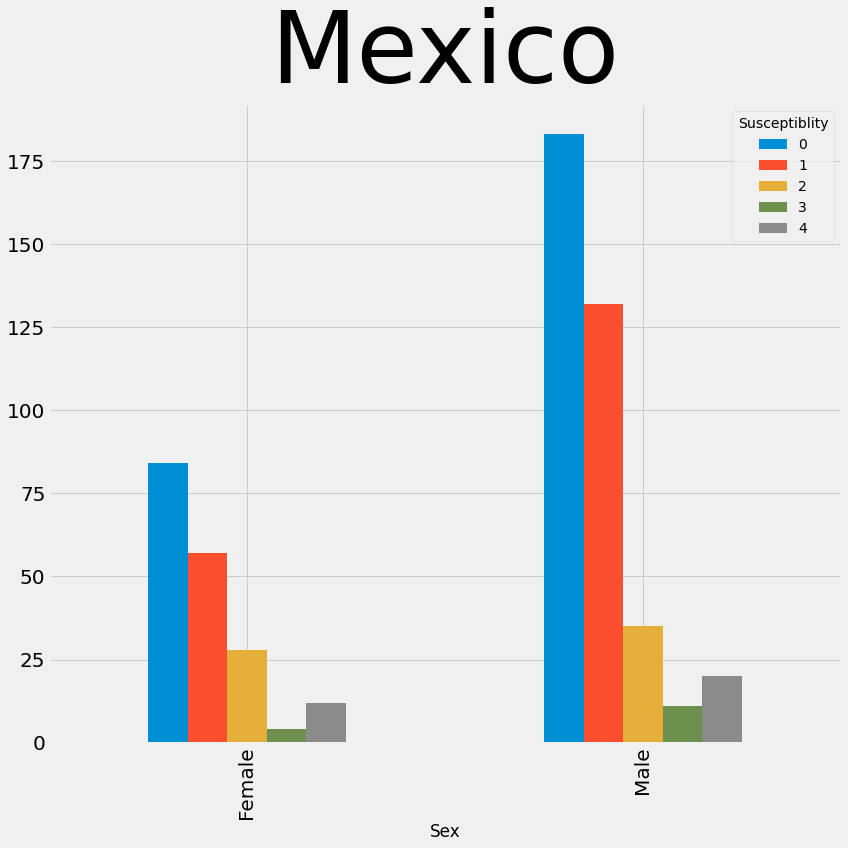

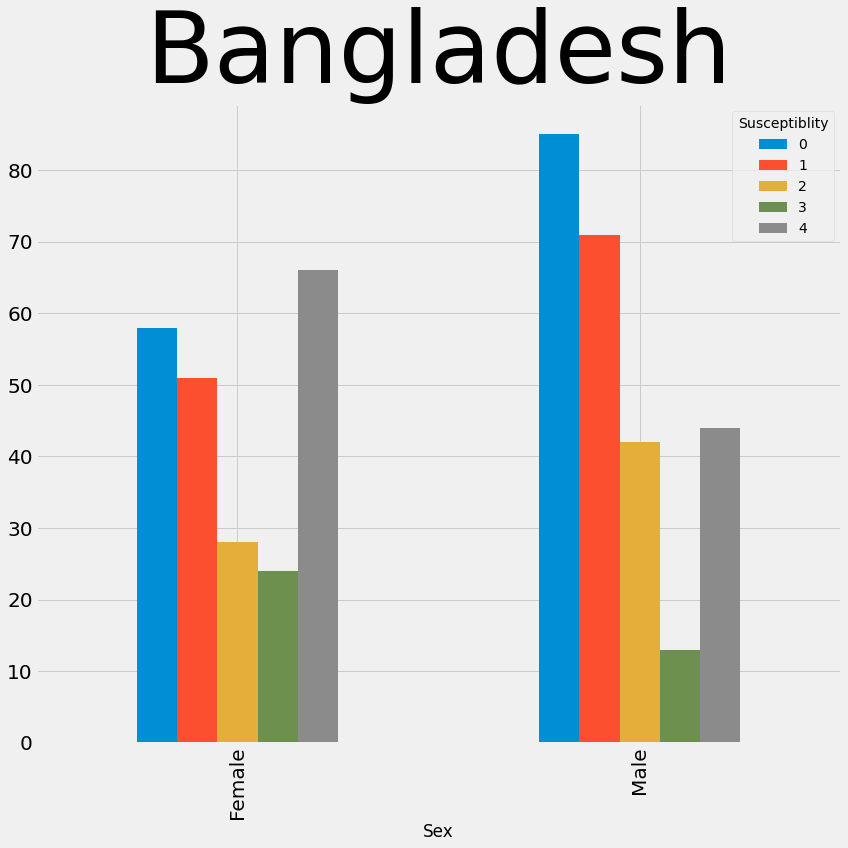

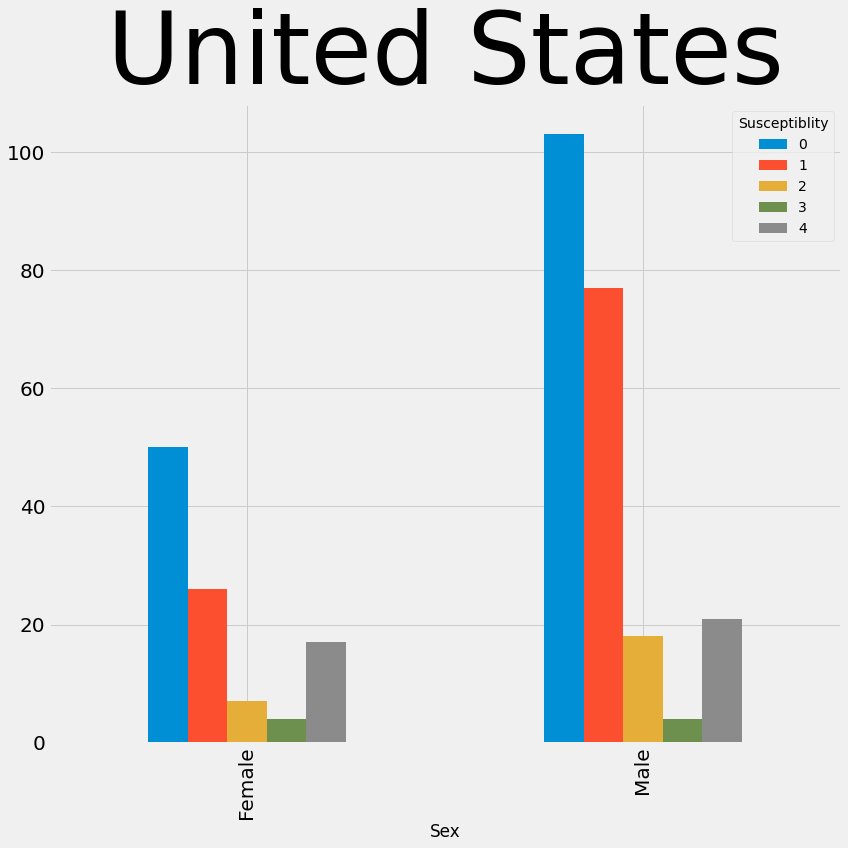

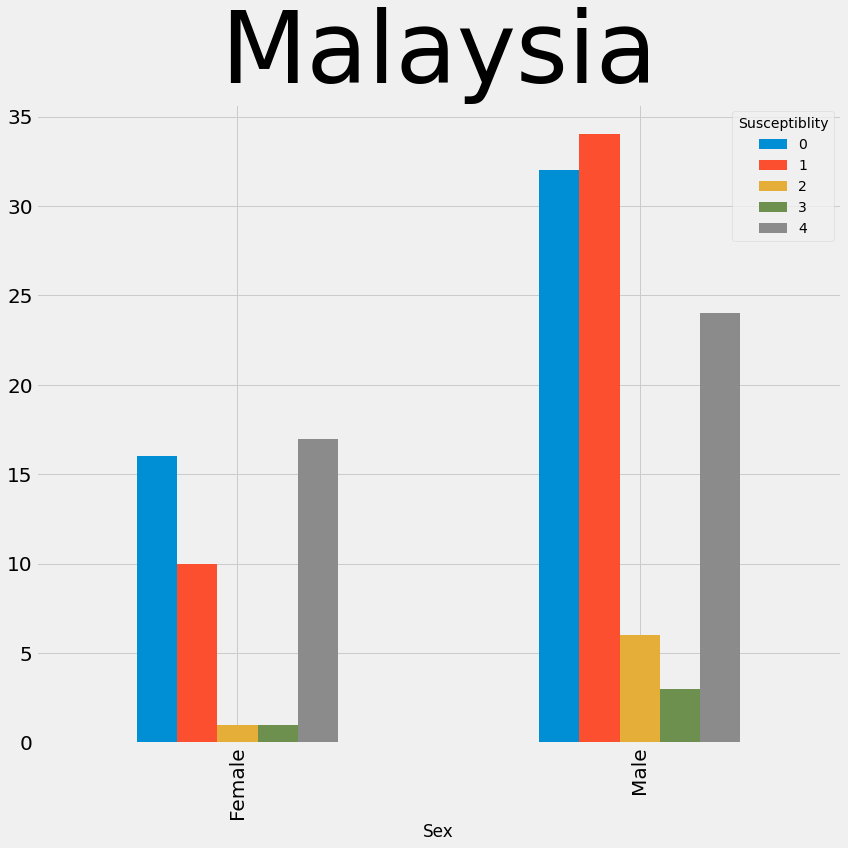

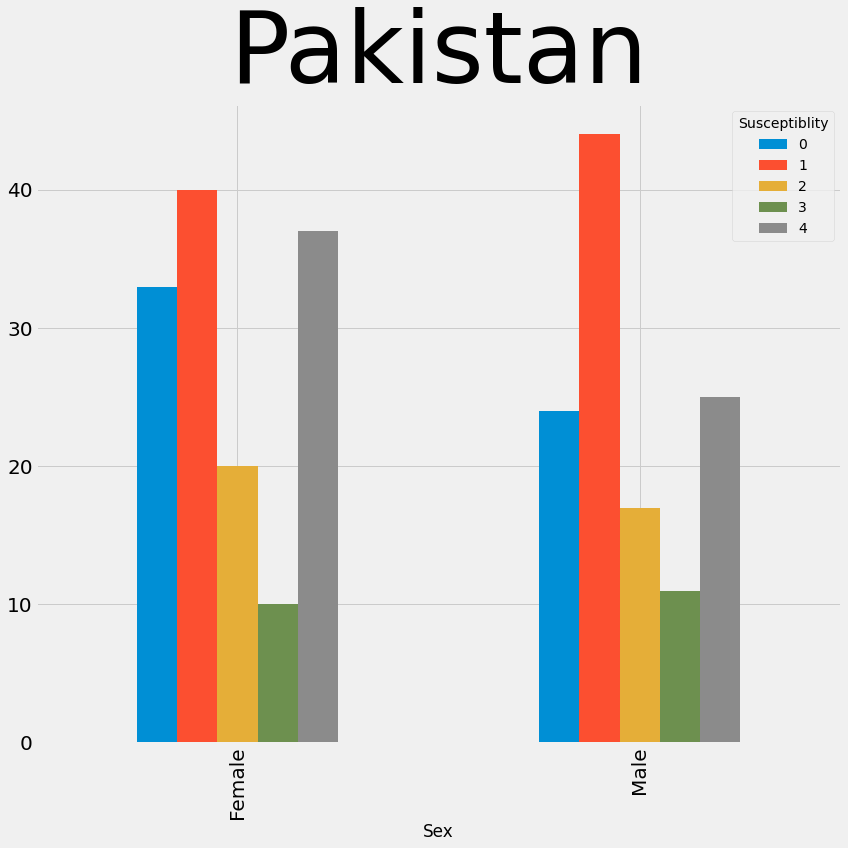

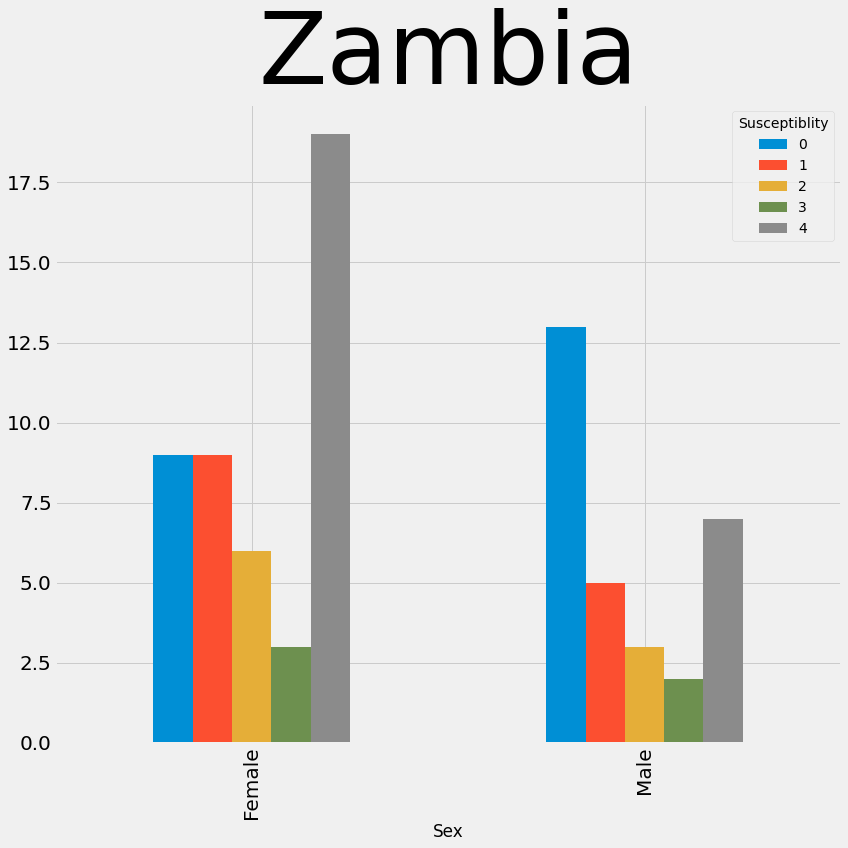

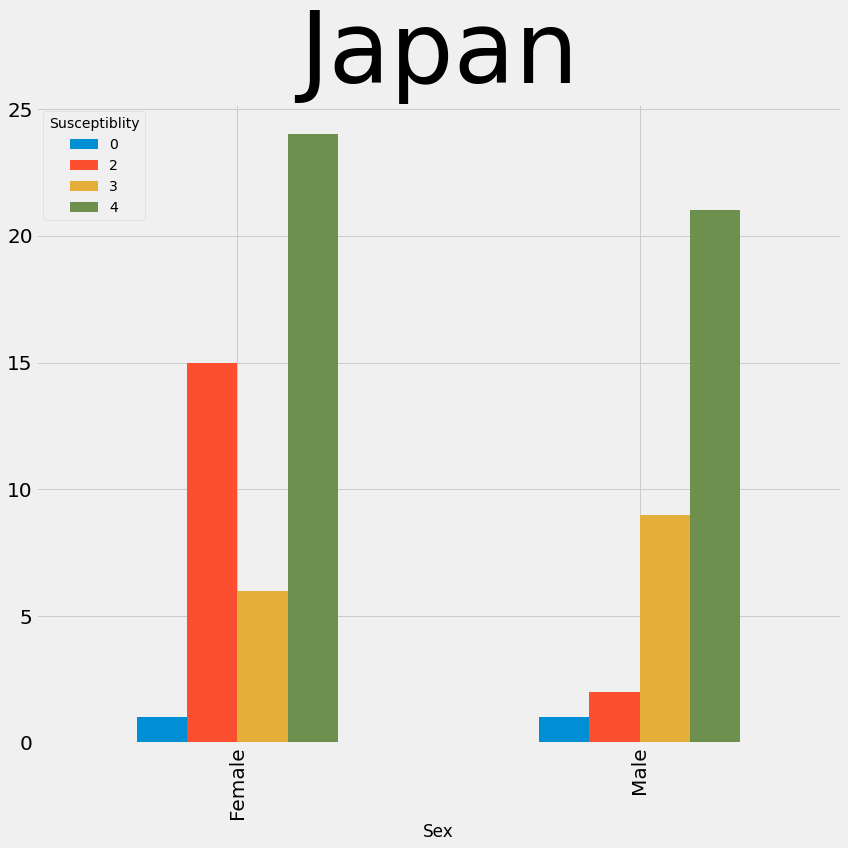

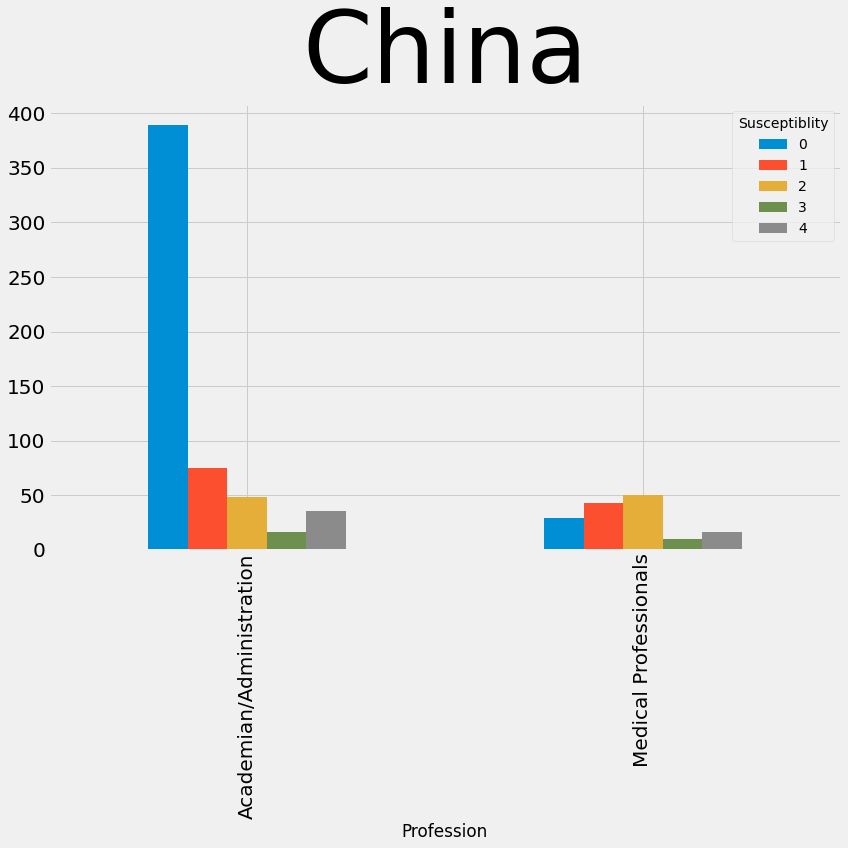

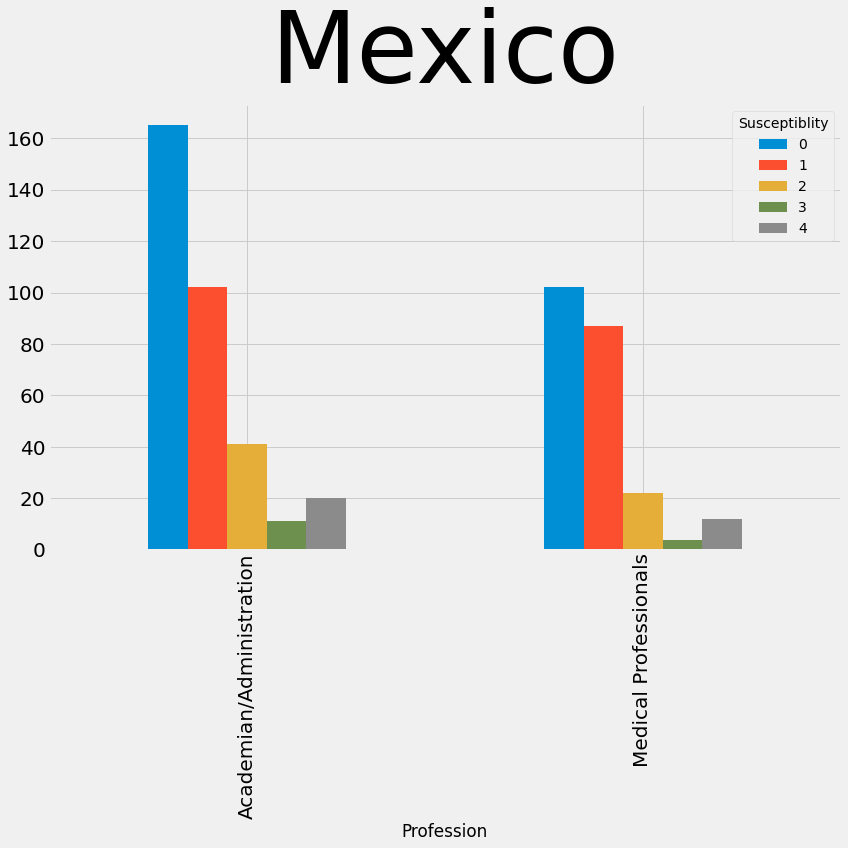

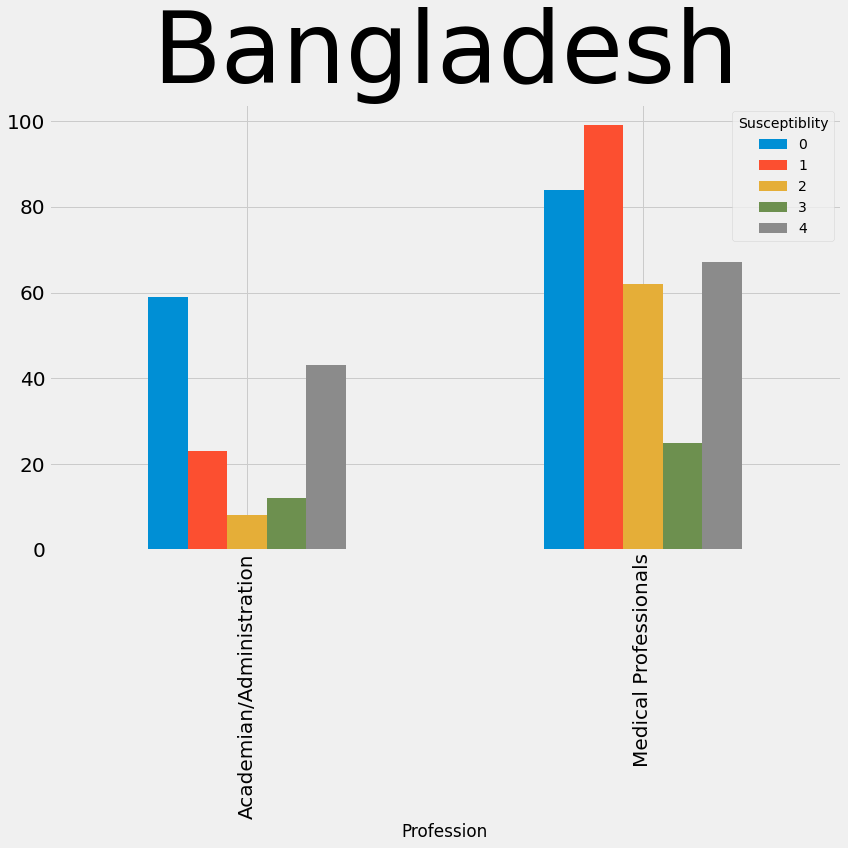

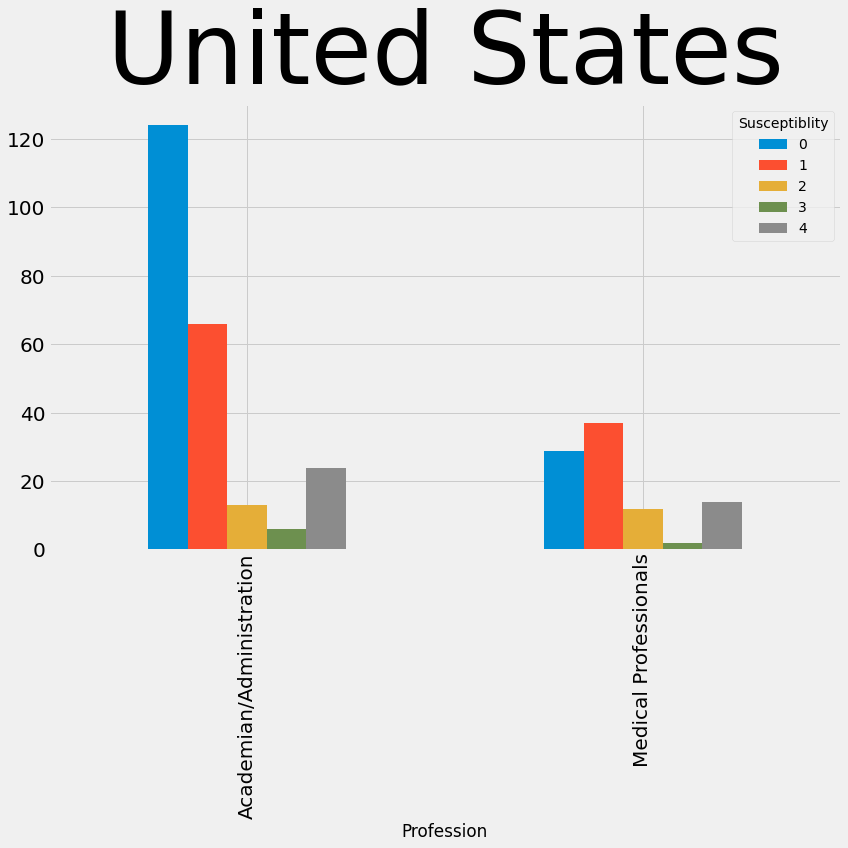

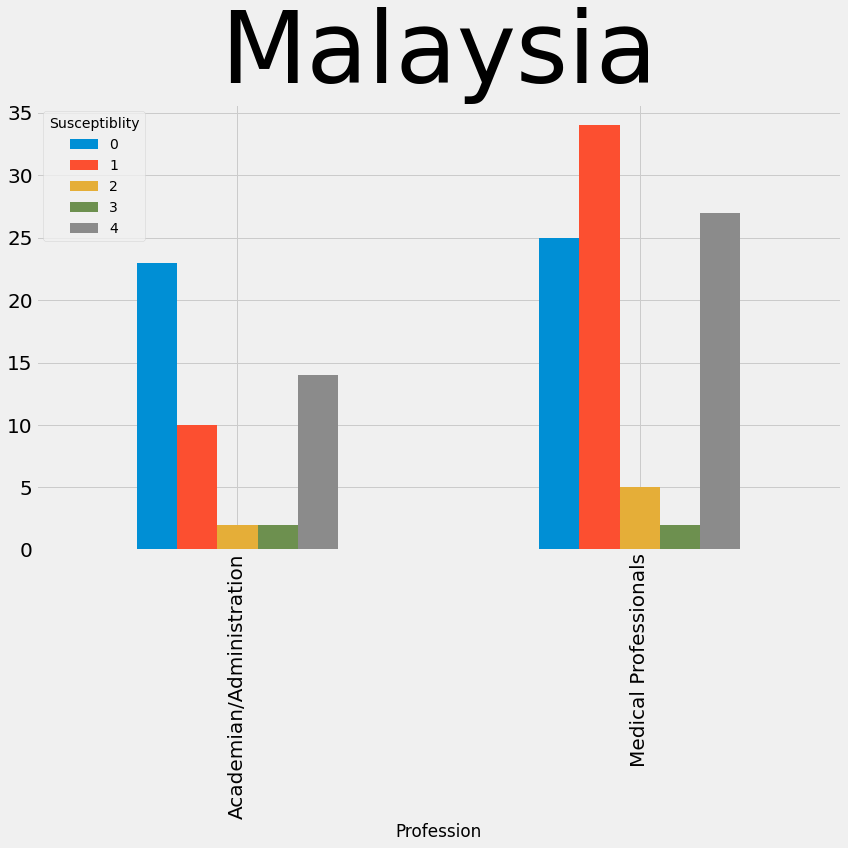

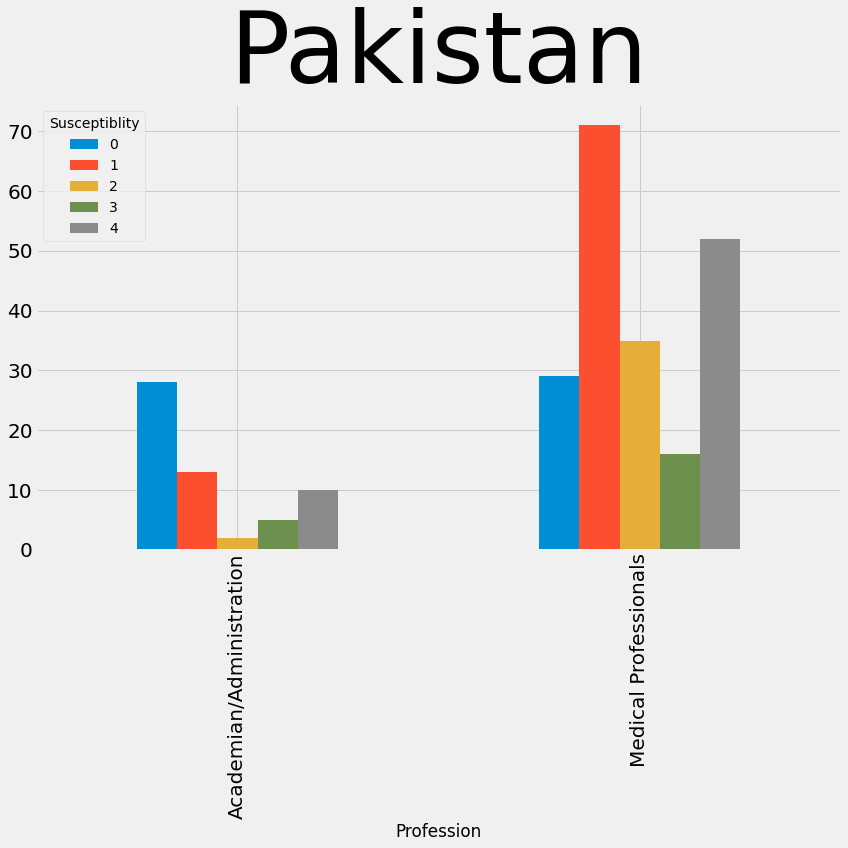

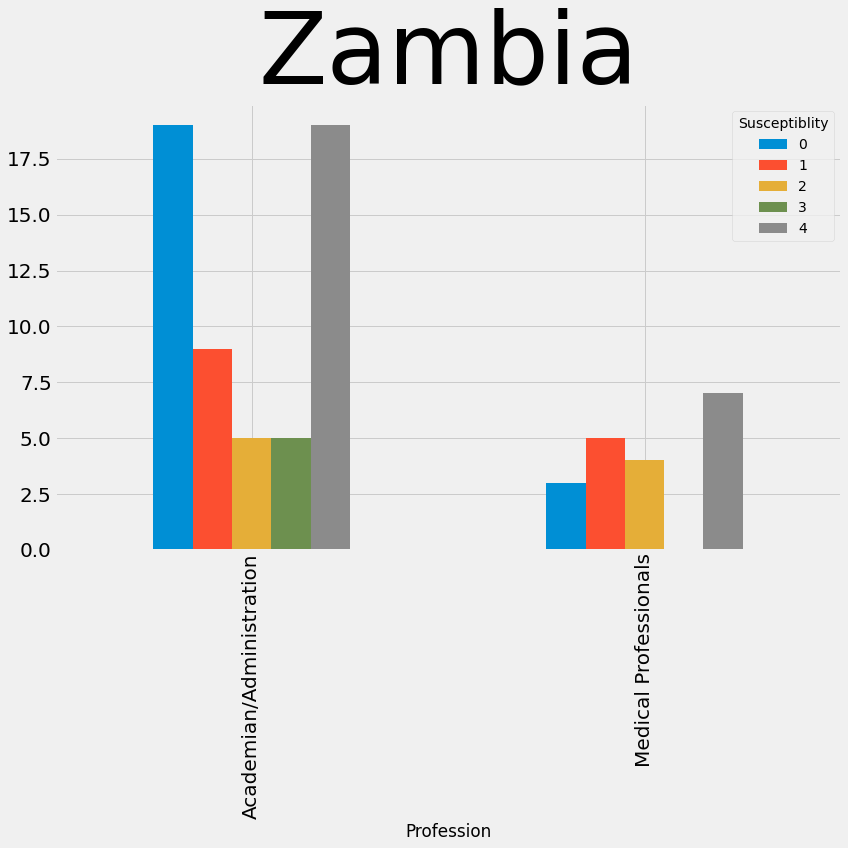

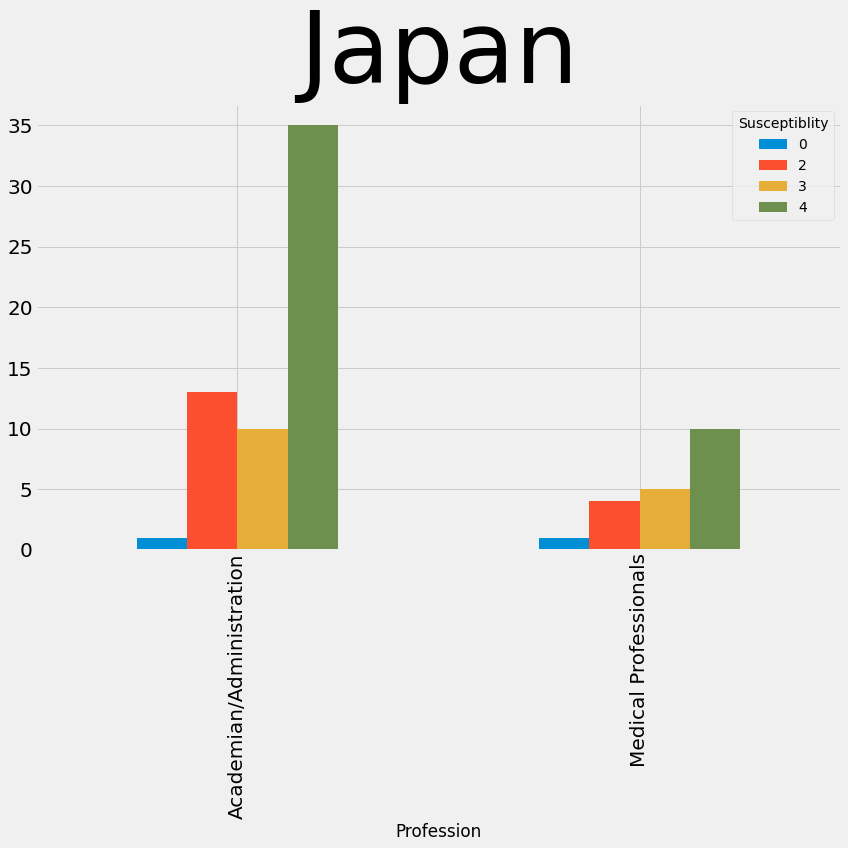

In [45]:
for c in [criterion[3]]:
    for f in field:
        results = []
        for i, country in enumerate(countries):
            df_test = cleaned[cleaned['Country'] == country]
            if not (country == 'China' and c =='Access_Of_Information'):
                results.append(chi_squared_test(df_test,country,f,c))
        output = pd.DataFrame(results, columns = ['Country','Value', 'Critical'])
        output['Significant'] = output['Value'] > output['Critical']
        df_styled = output.style.background_gradient()
        print(c+ " " + f)
        print(output)
        dfi.export(df_styled,f"Graph/{c}/{f}/table.png")

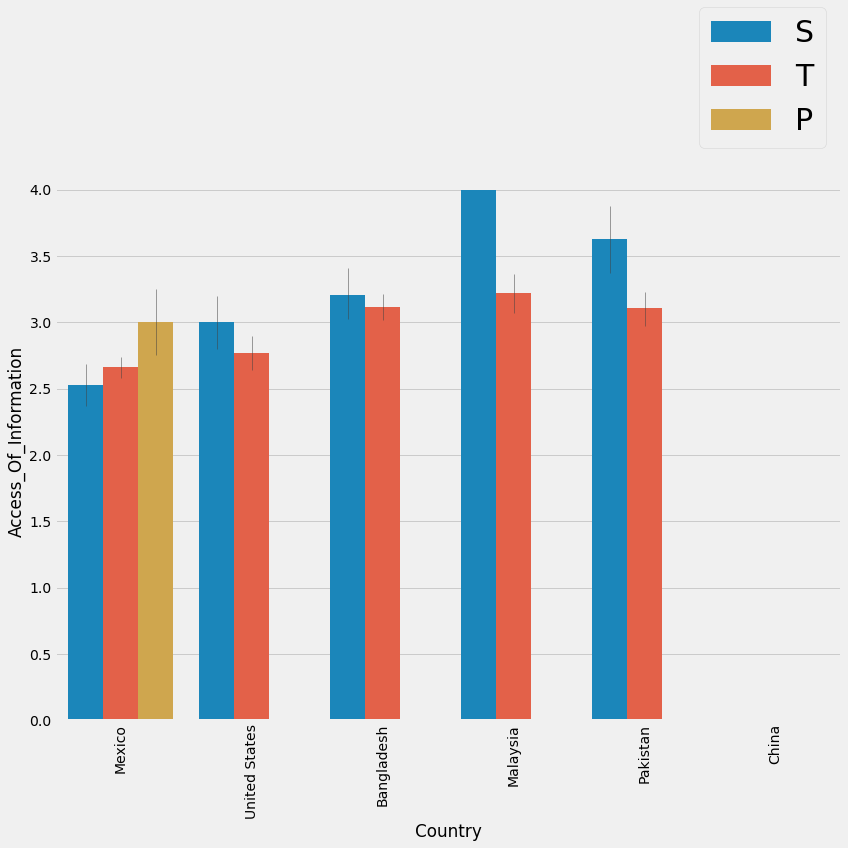

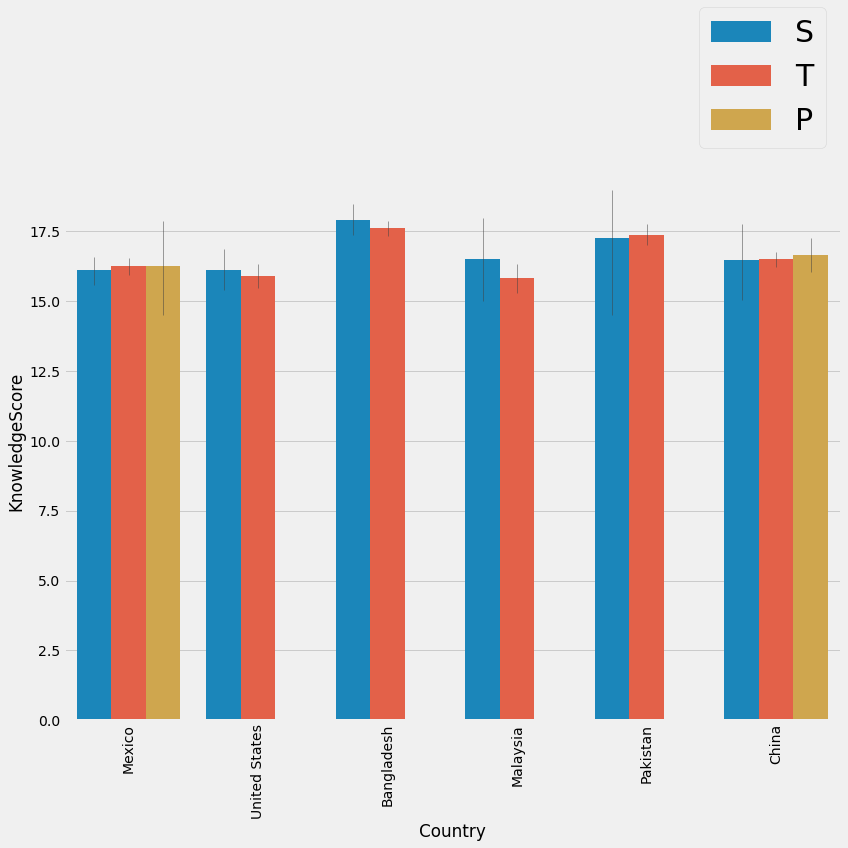

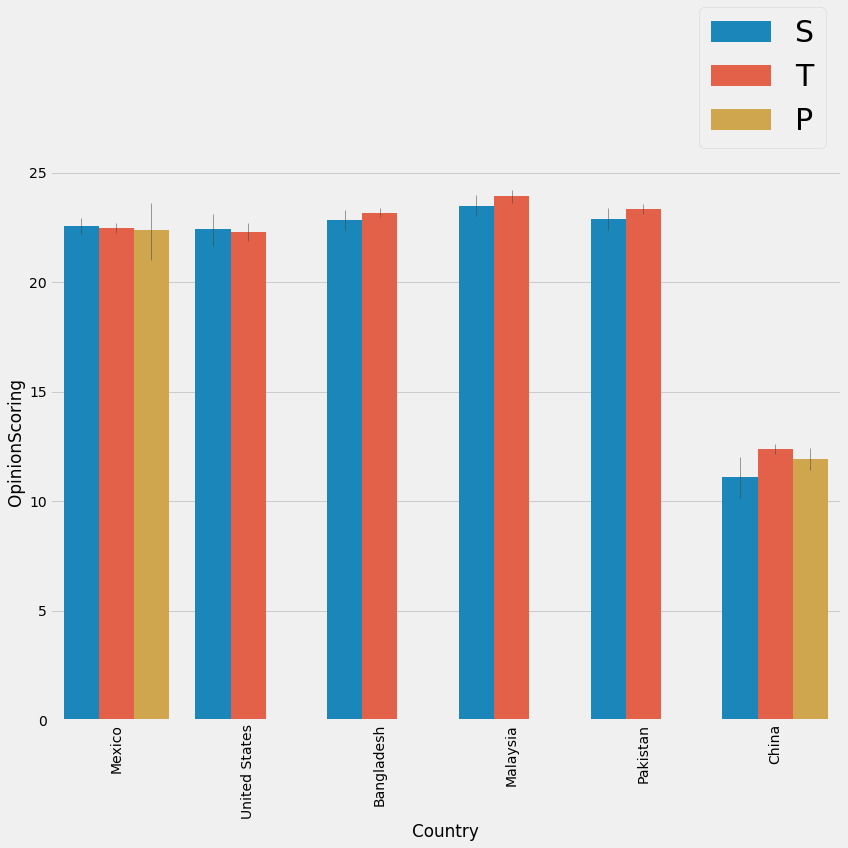

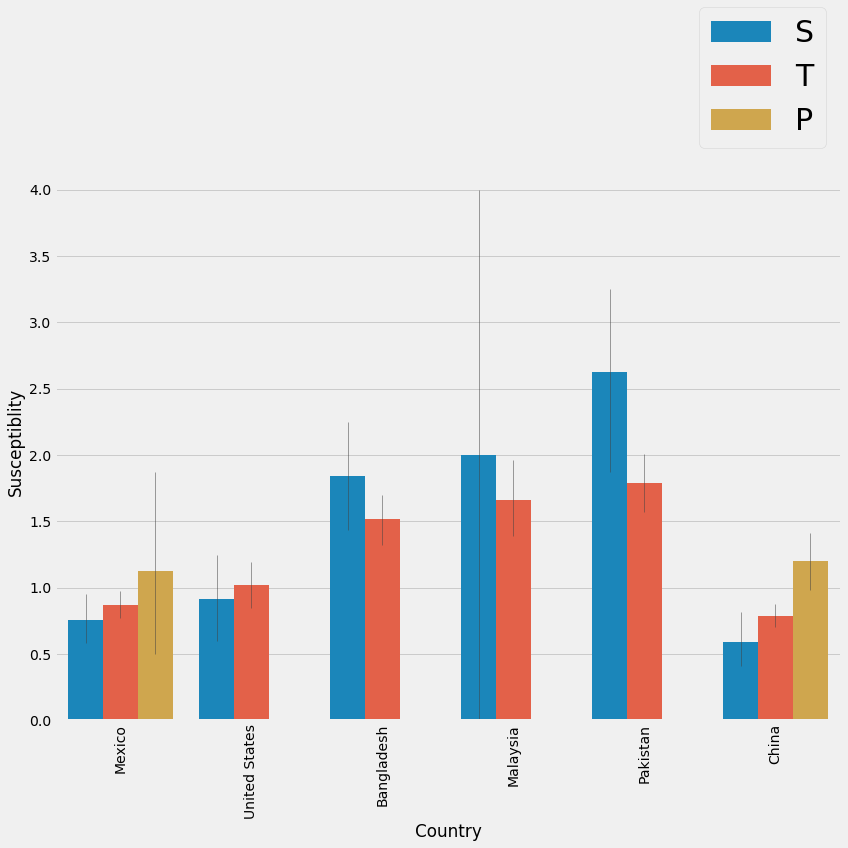

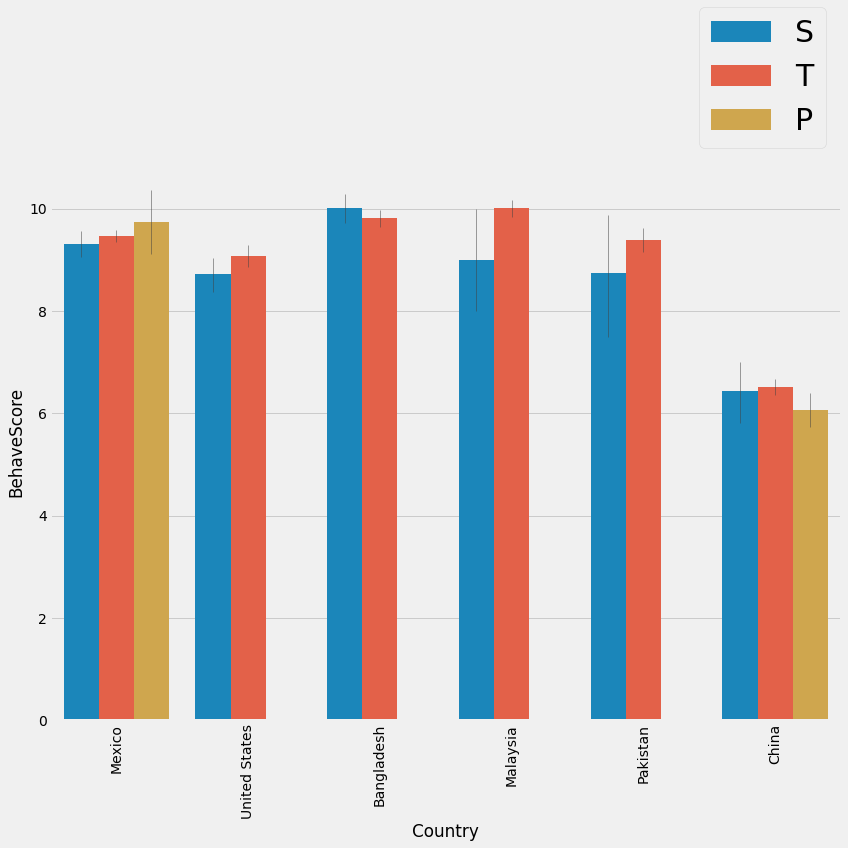

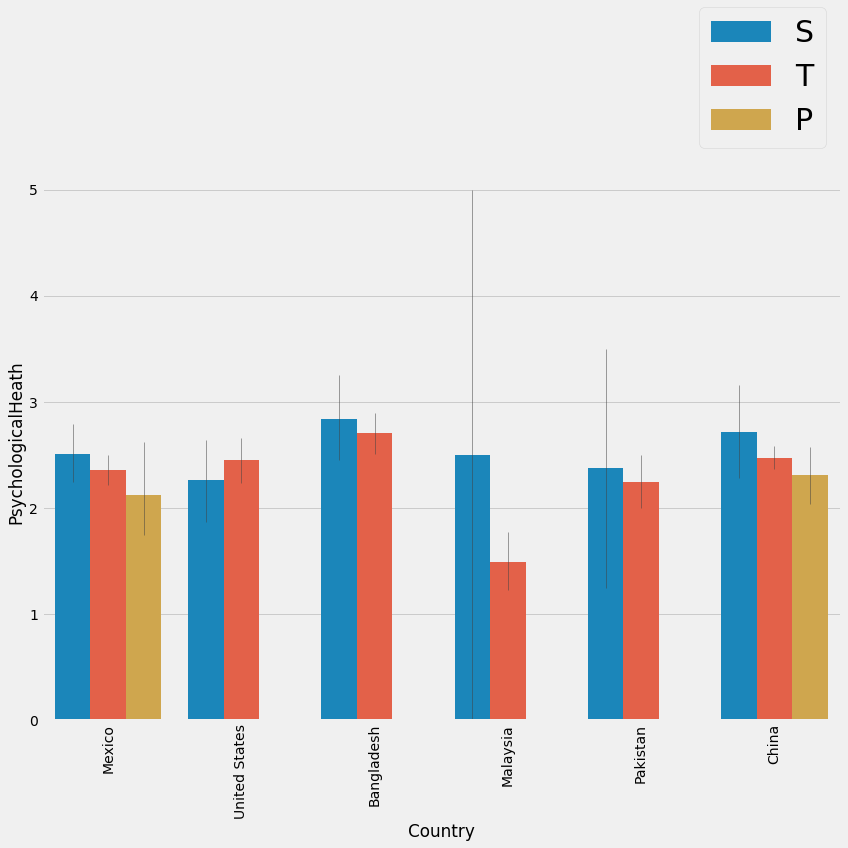

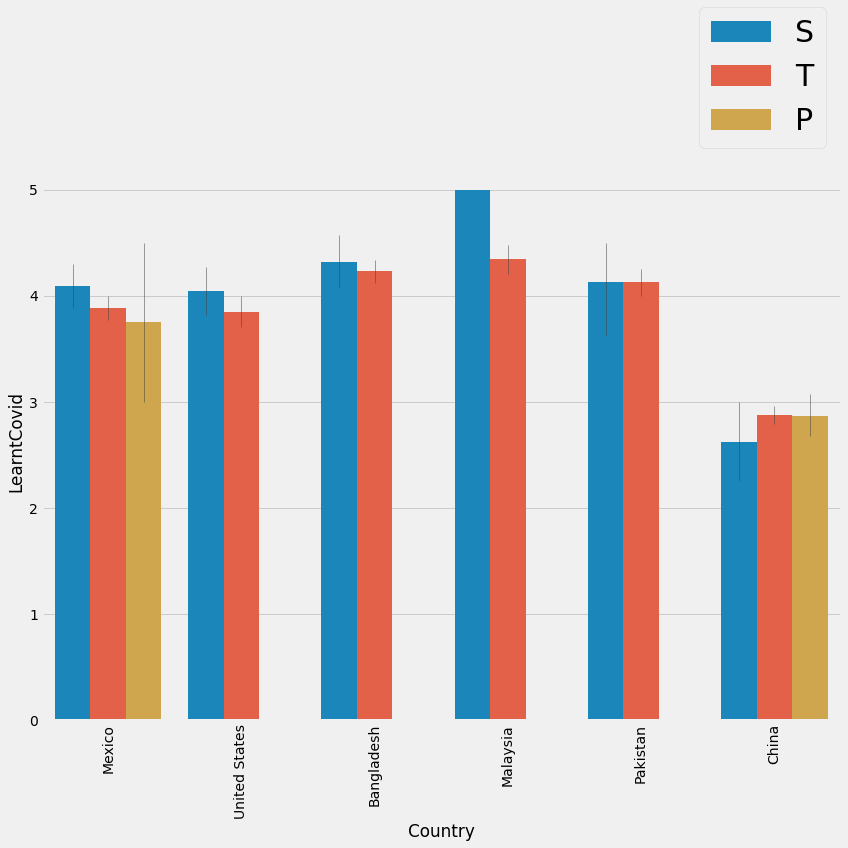

In [15]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
plt.style.use('fivethirtyeight')
cleaned =df[df['Country'].isin(countries)]
for c in criterion:
    for f in field:
        ax = sns.barplot(x="Country", y=c,hue=f, data=cleaned,ci=95,errwidth=0.5)  
        plt.xticks(rotation=90)
        plt.legend(bbox_to_anchor=(1, 1), loc=4,fontsize=30)
        plt.tight_layout()
        plt.savefig(os.path.join('Graph',f'{c}_{f}.png'))
        plt.show()

In [59]:
df.groupby(['Country'])['Profession'].value_counts()

Country     Profession              
Algeria     Academian/Administration      1
Argentina   Medical Professionals         1
Australia   Academian/Administration      1
            Medical Professionals         1
Bangladesh  Medical Professionals       337
                                       ... 
Venezuela   Medical Professionals         2
Wales       Medical Professionals         2
Yemen       Medical Professionals         1
Zambia      Academian/Administration     57
            Medical Professionals        19
Name: Profession, Length: 88, dtype: int64

In [32]:
countries_list[j]

['Mexico', 'United States', 'Bangladesh', 'Pakistan']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


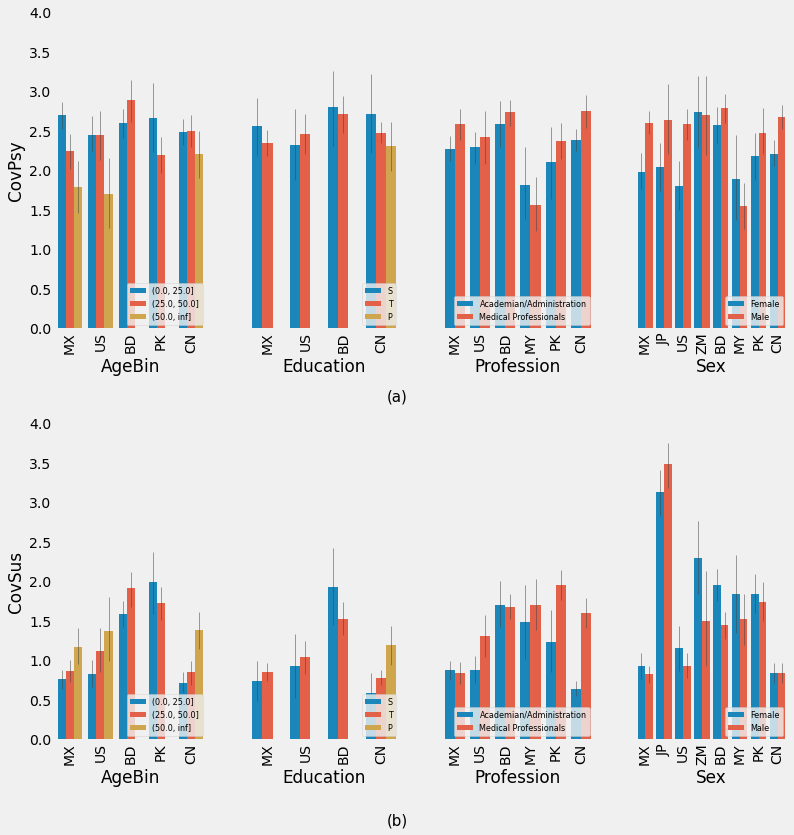

In [21]:
plt.style.use('fivethirtyeight')
fig,axs = plt.subplots(2,4)
# axs = axs.flatten()
criterion = ['Access_Of_Information', 'KnowledgeScore', 'OpinionScoring',
       'Susceptiblity', 'BehaveScore', 'PsychologicalHeath', 'LearntCovid']
countries_list = [['Mexico','United States','Bangladesh','Pakistan','China'],
                  ['Mexico','United States','Bangladesh','China'],
                 ['Mexico','United States','Bangladesh','Malaysia','Pakistan','China'],
                  ['Mexico','United States','Bangladesh','Pakistan','Malaysia','Zambia','Japan','China']]
label_list = [['MX','US','BD','PK','CN'],
             ['MX','US','BD','CN'],
             ['MX','US','BD','MY','PK','CN'],
             ['MX','US','BD','PK','MY','ZM','JP','CN']]
sub_criterion = ['PsychologicalHeath','Susceptiblity']
sub_titles = ['CovPsy','CovSus']
ylim = [4,4]
sub_field = ['AgeBin','Education','Profession','Sex']
# cleaned =df[df['Country'].isin(countries)]
for i,c in enumerate(sub_criterion):
    for j,f in enumerate(sub_field):
#         if i == 0:
#             temp = df[df['Country'].isin([x for x in countries_list[j] if x !='China'])]
#         else:
        temp = cleaned[cleaned['Country'].isin(countries_list[j])]
        g= sns.barplot(x="C_Code", y=c,hue=f, data=temp,ci=95,errwidth=0.5,ax=axs[i,j])
        g.set(ylim=(0, ylim[i]))
#         if i == 0:
#             g.set_xticklabels([x for x in label_list[j] if x != 'CN'])
#         else:
#         g.set_xticklabels(label_list[j])
        g.set_xlabel(sub_field[j])
        if j != 0: 
            g.set_yticklabels([])          
            g.set_ylabel(None)
        else:
            g.set_ylabel(sub_titles[i])
        
        if i == 0:
            plt.legend()
        
        
#         plt.tight_layout()
#         plt.savefig(os.path.join('Graph',f'{c}_{f}.png'))
for ax in fig.get_axes():
#     ax.label_outer()
    ax.tick_params(axis='x',labelrotation=90)
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
for ax in axs.flatten():    
    ax.legend(loc=4,fontsize=8)
    ax.grid(False)
plt.figtext(0.5,0.5,"(a)", va="center", ha="center", size=15)
plt.figtext(0.5,0.01,"(b)", va="center", ha="center", size=15)
fig.tight_layout(pad=3.0)
# for i in range(4):
#     axs[0,i].legend(loc=0,fontsize=8)
# axs[0,2].legend(loc=4,fontsize=8)
# axs[1,3].legend(loc=4)
plt.savefig('F3.png',dpi=350)
plt.show()

In [37]:
df

,Profession,Country,Region,Education,Sex,Age,AgeBin,Maritial,1.1_HeardCovid,1.2_Television/Radio,...,4.1_SocialExclusion,4.1_Lonliness,Access_Of_Information,N90BestToControlSpread,KnowledgeScore,OpinionScoring,Susceptiblity,BehaveScore,PsychologicalHeath,LearntCovid
0,Academian/Administration,Mexico,Central America and Mexico,NaN,Female,18,"(0.0, 25.0]",3,0,0.0,...,0,1,0.0,0,0,6,0,0,4,1.0
1,Medical Professionals,Ghana,"West Africa( Ghana, Nigeria)",T,Female,22,"(0.0, 25.0]",1,1,1.0,...,1,1,4.0,0,18,20,3,8,4,5.0
2,Medical Professionals,Ghana,"West Africa( Ghana, Nigeria)",T,Female,21,"(0.0, 25.0]",1,1,1.0,...,0,0,3.0,0,17,20,1,10,0,3.0
3,Academian/Administration,Japan,"East Asia (China, Japan, South korea)",S,Female,21,"(0.0, 25.0]",1,1,1.0,...,1,1,3.0,0,16,18,4,8,5,4.0
4,Academian/Administration,United States,"North America (United States of America, Canada)",NaN,Female,35,"(25.0, 50.0]",2,1,1.0,...,0,0,1.0,1,16,24,0,5,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,Academian/Administration,Mexico,Central America and Mexico,T,Male,30,"(25.0, 50.0]",1,1,1.0,...,0,1,2.0,1,20,24,1,9,2,5.0
3027,Medical Professionals,Mexico,Central America and Mexico,S,Male,20,"(0.0, 25.0]",1,1,1.0,...,1,1,2.0,0,16,17,1,8,3,5.0
3028,Medical Professionals,Mexico,Central America and Mexico,NaN,Male,24,"(0.0, 25.0]",1,1,1.0,...,0,1,3.0,0,19,25,0,10,4,4.0
3029,Medical Professionals,Mexico,Central America and Mexico,S,Female,20,"(0.0, 25.0]",1,1,1.0,...,0,0,2.0,0,18,20,4,10,1,5.0


In [12]:
def country_code(x):
    if x == 'United States':
        return 'US'
    elif x == 'Japan':
        return 'JP'
    elif x == 'Bangladesh':
        return 'BD'
    elif x =='Zambia':
        return 'ZM'
    elif x =='Mexico':
        return 'MX'
    elif x =='Malaysia':
        return 'MY'
    elif x =='Pakistan':
        return 'PK'
    elif x == 'China':
        return 'CN'


In [13]:
cleaned['C_Code'] = cleaned['Country'].apply(lambda x :country_code(x))

In [28]:
df['BehaveScore'].value_counts()

10    764
11    604
9     561
8     336
7     252
6     189
5     106
4      86
3      57
2      12
1       6
0       2
Name: BehaveScore, dtype: int64

In [9]:
df['Access_Of_Information'].value_counts()

3.0    881
4.0    664
2.0    562
1.0    143
0.0     13
Name: Access_Of_Information, dtype: int64

In [51]:
cleaned['C_Code'].value_counts()

CN    712
MX    566
BD    482
US    327
PK    261
MY    144
JP     79
ZM     76
Name: C_Code, dtype: int64

In [52]:
cleaned['Country'].value_counts()

China            712
Mexico           566
Bangladesh       482
United States    327
Pakistan         261
Malaysia         144
Japan             79
Zambia            76
Name: Country, dtype: int64